# Streamlines
This notebook shows the steps in the design of streamlines for a path in the Waterloopbos.
The goal is to get an interesting pattern of streamlines

In [1]:
import pathlib

# Read FM output
import pyugrid

# TODO: use underlying code?
import flowmap.formats
import flowmap.particles

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# open the netCDF file
path = pathlib.Path('~/Downloads/DFM_OUTPUT_FlowFM/FlowFM_map-run-1.nc').expanduser()
n_particles = 300000

In [3]:
# read the data
grid = flowmap.formats.UGrid(str(path))
grid.options['n_particles'] = n_particles
grid.streamlines(-1)

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [4]:
# convert to VTK polydata
polydata = grid.to_polydata()
# fill in data for current timestep
grid.update_polydata(polydata, -1)
# seed (starting points)
seed = flowmap.particles.make_particles(polydata, n=n_particles)
# tracer pipeline (seed + polydat -> streamtracer -> extract lines)
tracer = flowmap.particles.make_tracer_pipeline(polydata, seed)

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [5]:
# compute the streamlines
tracer.update()
# extract table with lines
lines = flowmap.particles.extract_lines(tracer)

In [6]:
# show the table
lines.tail()

,IntegrationTime,ReasonForTermination,SeedIds,line,points
9636,10968.122829,4,300203,"[[7490094.0, 20502762.0, 0.0], [7490049.5, 205...","[181861, 181862, 181863, 181864, 181865, 18186..."
9637,15695.252100,4,300208,"[[7489464.5, 20502592.0, 0.0], [7489420.0, 205...","[181884, 181885, 181886, 181887, 181888, 18188..."
9638,538.496159,1,300254,"[[7485966.0, 20504306.0, 0.0], [7485923.5, 205...","[181905, 181906]"
9639,7539.310537,4,300261,"[[7488660.5, 20505678.0, 0.0], [7488616.5, 205...","[181907, 181908, 181909, 181910, 181911, 18191..."
9640,9142.098134,4,300285,"[[7490186.5, 20502696.0, 0.0], [7490142.5, 205...","[181928, 181929, 181930, 181931, 181932, 18193..."


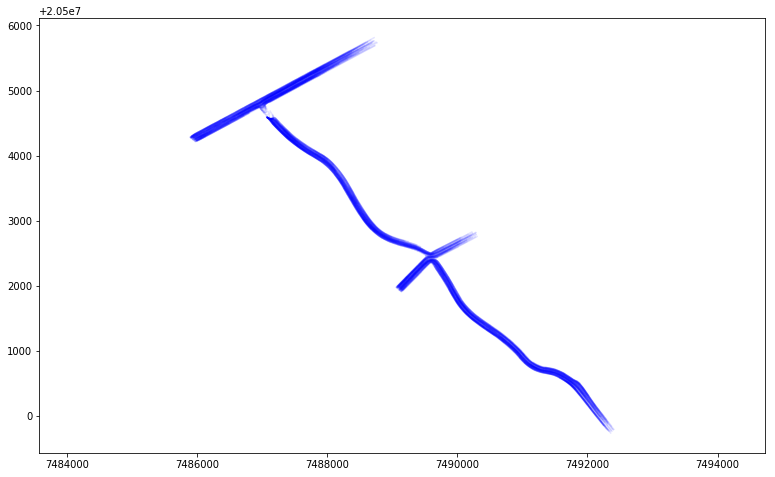

In [7]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('equal')
def plot_line(line):
    ax.plot(line[:, 0], line[:, 1], 'b-', alpha=0.1)
lines.head(n=1000).line.apply(plot_line);

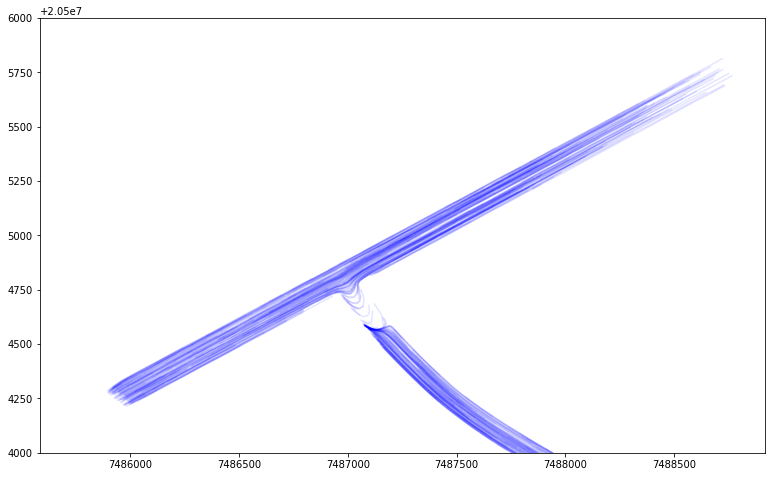

In [8]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('equal')
def plot_line(line):
    ax.plot(line[:, 0], line[:, 1], 'b-', alpha=0.1)
ax.set_xlim(7486500, 7488000)
ax.set_ylim(20504000, 20506000)
lines.head(n=1000).line.apply(plot_line);

In [9]:
# open the netCDF file
path = pathlib.Path('~/Downloads/DFM_OUTPUT_FlowFM/FlowFM_map-run-2.nc').expanduser()
n_particles = 30000

In [10]:
# read the data
grid = flowmap.formats.UGrid(str(path))
grid.options['n_particles'] = n_particles
grid.streamlines(-1)

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [11]:
# convert to VTK polydata
polydata = grid.to_polydata()
# fill in data for current timestep
grid.update_polydata(polydata, -1)
# seed (starting points)
seed = flowmap.particles.make_particles(polydata, n=n_particles)
# tracer pipeline (seed + polydat -> streamtracer -> extract lines)
tracer = flowmap.particles.make_tracer_pipeline(polydata, seed)

/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [12]:
# compute the streamlines
tracer.update()
# extract table with lines
lines = flowmap.particles.extract_lines(tracer)

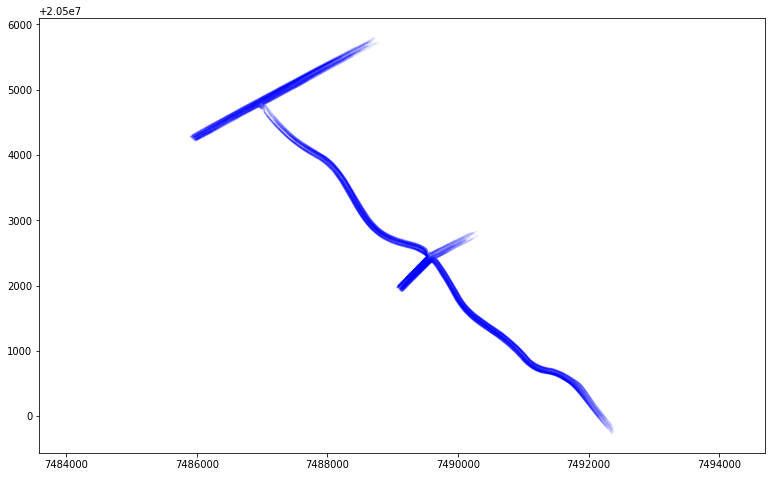

In [13]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('equal')
def plot_line(line):
    ax.plot(line[:, 0], line[:, 1], 'b-', alpha=0.1)
lines.head(n=1000).line.apply(plot_line);

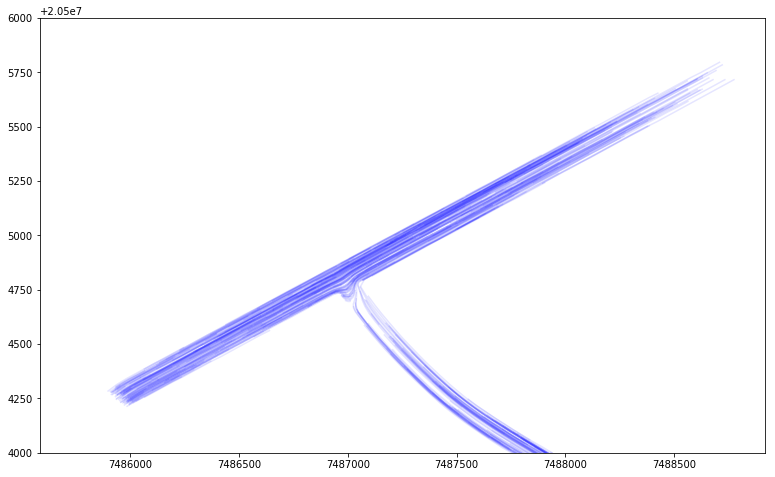

In [21]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('equal')
def plot_line(line):
    ax.plot(line[:, 0], line[:, 1], 'b-', alpha=0.1)
ax.set_xlim(7486500, 7488000)
ax.set_ylim(20504000, 20506000)
lines.head(n=1000).line.apply(plot_line);

<IPython.core.display.Javascript object>


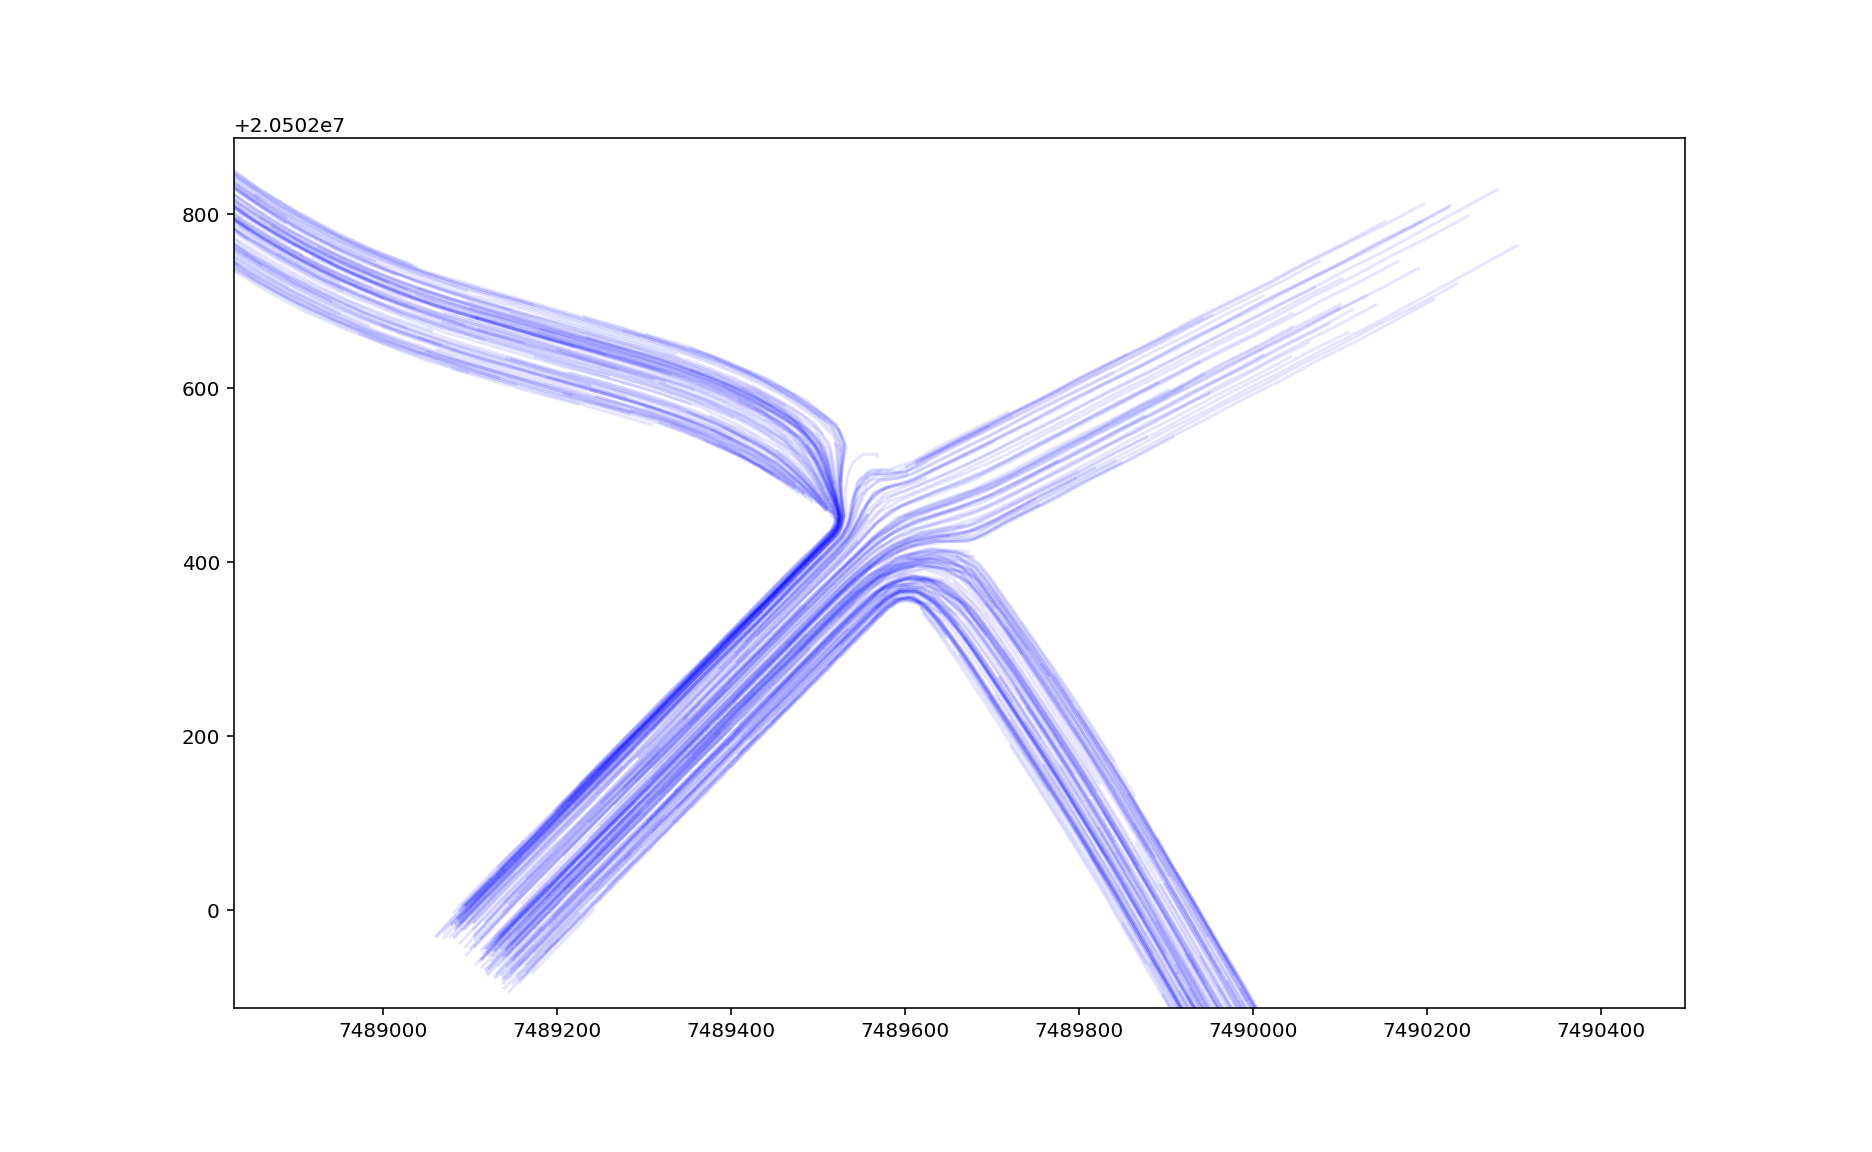

In [23]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('equal')
def plot_line(line):
    ax.plot(line[:, 0], line[:, 1], 'b-', alpha=0.1)
ax.set_xlim(7488600, 7489800)
ax.set_ylim(20502000, 20503000)
lines.head(n=1000).line.apply(plot_line);

